---
title: "Exploratory Data Analysis"
format:
    html: 
        code-fold: false
---

<!-- After digesting the instructions, you can delete this cell, these are assignment instructions and do not need to be included in your final submission.  -->

{{< include instructions.qmd >}} 

# Code 

- **Introduction and Motivation:** The purpose of this notebook is to perform Exploratory Data Analysis (EDA) on the processed TFT gameplay dataset. The various analytics and tests done are done as tests for potential modeling ideas.  
- **Overview of Methods:** Ttest, Bar Graphs, Heatmaps 

In [1]:
#import packages this file uses
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import itertools
from collections import Counter
from scipy import stats

In [2]:
#Import singlar combined csv file from raw data step as a pandas df
dfTFT = pd.read_csv("../data/processed-data/TFT_processed-data.csv")

In [3]:
#Only Use Version 15.22. Comparing versions isnt a one to one comparison
dfTFT = dfTFT[dfTFT["Release_Version"] == 15.22]

In [4]:
#Note: top1, top4, bottom4 are all binarys. 
dfTFT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32455 entries, 0 to 48667
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   match_id         32455 non-null  object 
 1   puuid            32455 non-null  object 
 2   placement        32455 non-null  int64  
 3   level            32455 non-null  int64  
 4   time_eliminated  32455 non-null  float64
 5   total_damage     32455 non-null  int64  
 6   game_length      32455 non-null  float64
 7   game_version     32455 non-null  object 
 8   gold_left        32455 non-null  int64  
 9   traits           32455 non-null  object 
 10  units            32455 non-null  object 
 11  num_traits       32455 non-null  int64  
 12  num_units        32455 non-null  int64  
 13  num_1star        32455 non-null  int64  
 14  num_2star        32455 non-null  int64  
 15  num_3star        32455 non-null  int64  
 16  num_cost1        32455 non-null  int64  
 17  num_cost2        

In [5]:
#Get decriptive stats of int and float fields
dfTFT.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
placement,32455.0,4.497088,2.292538e+00,1.000000,2.000000,4.000000,6.000000,8.000000
level,32455.0,8.539670,8.527264e-01,1.000000,8.000000,9.000000,9.000000,10.000000
time_eliminated,32455.0,1886.681196,2.750301e+02,7.777373,1682.768311,1904.160767,2090.404053,2748.024658
total_damage,32455.0,95.586597,4.821405e+01,0.000000,59.000000,89.000000,128.000000,270.000000
game_length,32455.0,2190.228240,1.451466e+02,7.777373,2098.891357,2187.416260,2284.013916,2756.449219
gold_left,32455.0,8.620644,1.544957e+01,0.000000,0.000000,1.000000,9.000000,183.000000
num_traits,32455.0,10.354830,2.287158e+00,0.000000,9.000000,10.000000,12.000000,20.000000
num_units,32455.0,8.695671,1.048188e+00,0.000000,8.000000,9.000000,9.000000,13.000000
num_1star,32455.0,2.155754,1.543375e+00,0.000000,1.000000,2.000000,3.000000,10.000000
num_2star,32455.0,5.646927,2.119941e+00,0.000000,4.000000,6.000000,7.000000,12.000000


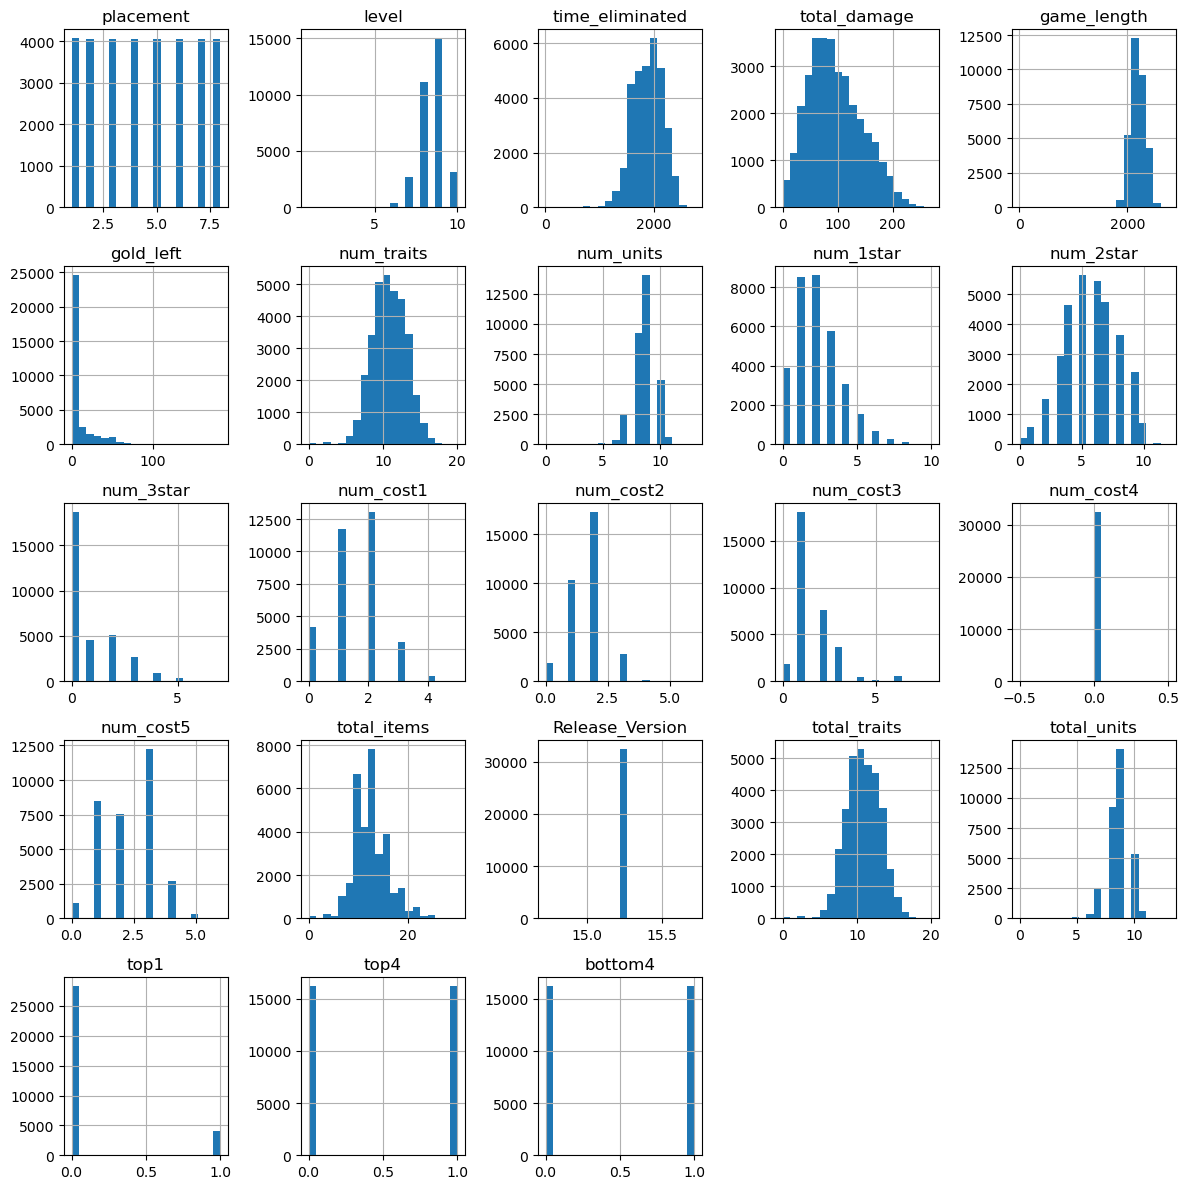

In [6]:
#Create Histograms of all int and float fields
num_cols = dfTFT.select_dtypes(include=['int64','float64']).columns
dfTFT[num_cols].hist(bins = 20, figsize = (12,12))
plt.tight_layout()
plt.show()

**Data Distribution**

In [7]:
#Histogram visually shows skew among a couple of fields 
#Lets determine the skew of num cols
dfTFT[num_cols].skew().sort_values()

game_length       -2.035491
total_units       -1.231842
num_units         -1.231842
level             -0.769241
time_eliminated   -0.462091
total_traits      -0.124075
num_traits        -0.124075
num_cost2         -0.092288
num_2star         -0.079416
num_cost5         -0.024680
top4              -0.001787
Release_Version    0.000000
num_cost4          0.000000
placement          0.000957
bottom4            0.001787
num_cost1          0.216555
total_damage       0.439562
total_items        0.513083
num_1star          0.849210
num_3star          1.298909
num_cost3          1.776404
top1               2.258501
gold_left          2.865710
dtype: float64

In [8]:
#Look at Kurtosis
dfTFT[num_cols].kurt().sort_values()

top4               -2.000120
bottom4            -2.000120
placement          -1.238937
num_cost5          -0.615949
num_2star          -0.486263
total_damage       -0.400370
Release_Version     0.000000
num_cost4           0.000000
num_cost1           0.100252
num_traits          0.224385
total_traits        0.224385
num_cost2           0.435328
num_1star           0.770351
num_3star           0.939878
time_eliminated     1.134067
total_items         1.376238
level               2.684690
top1                3.101018
num_cost3           4.749030
num_units           7.040564
total_units         7.040564
gold_left          12.030834
game_length        29.433887
dtype: float64

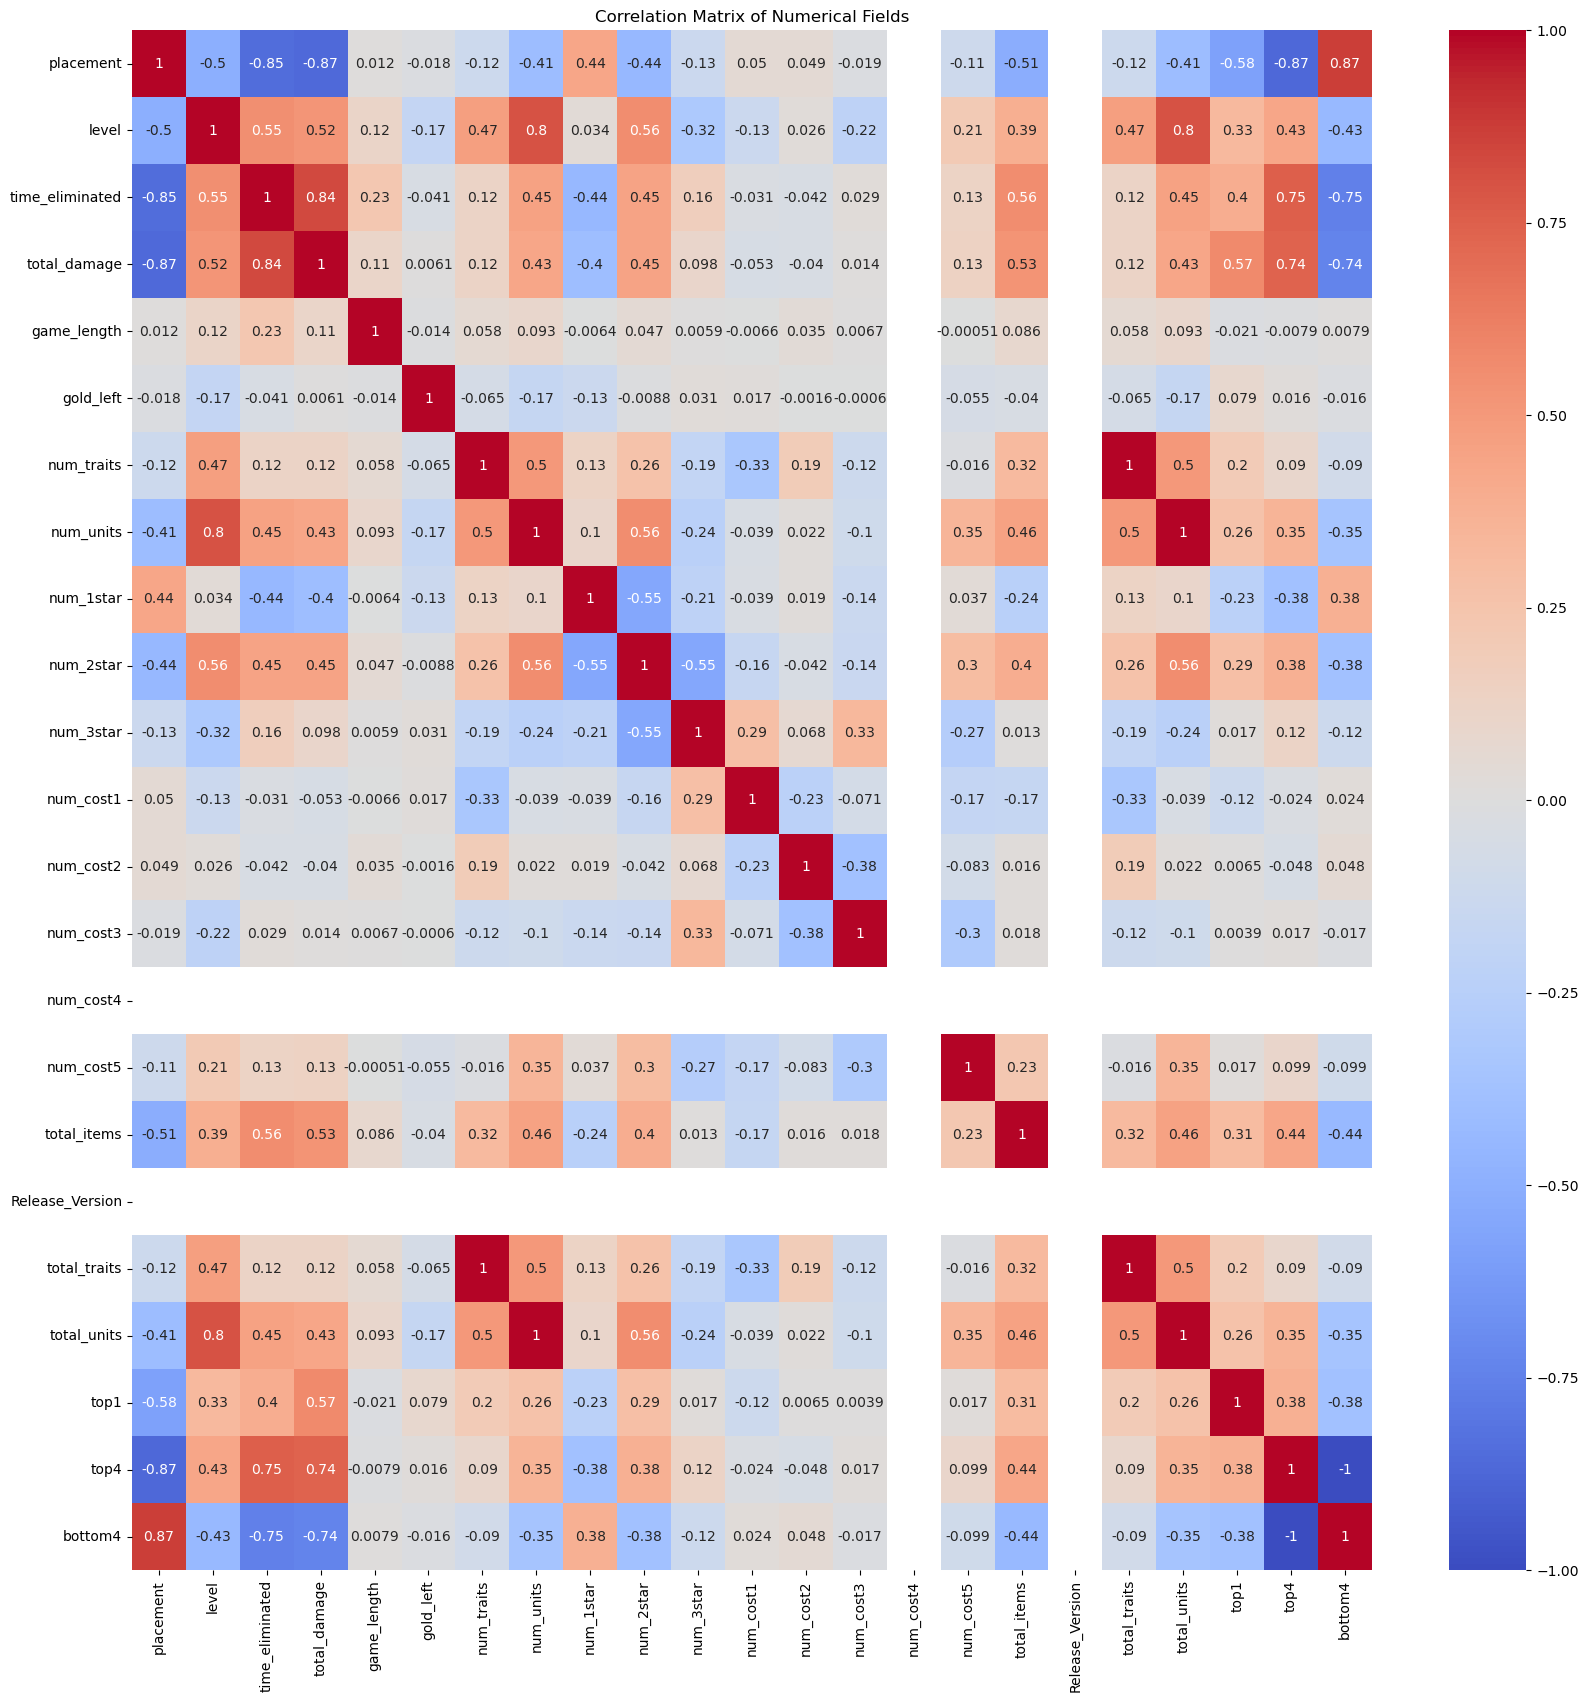

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(dfTFT[num_cols].corr(),annot = True, cmap = 'coolwarm')
plt.title("Correlation Matrix of Numerical Fields")
plt.show()

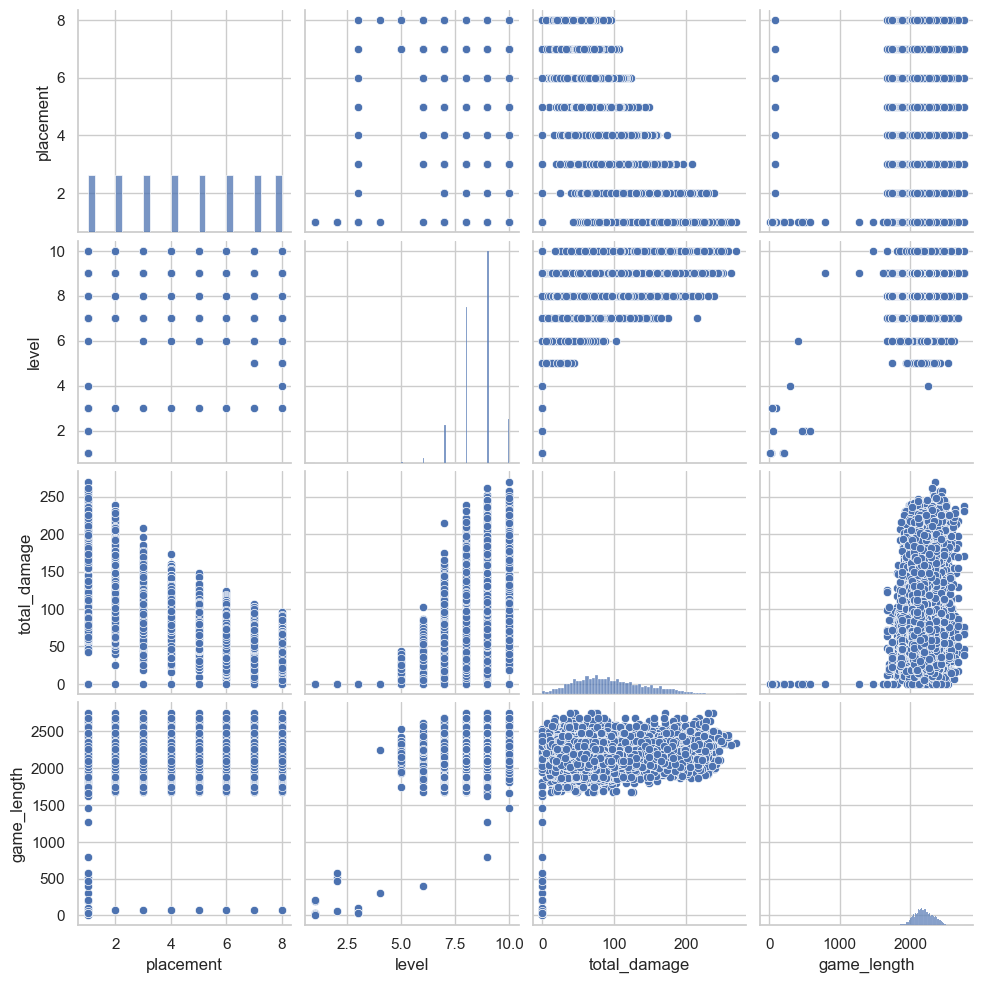

In [10]:
#Look at pairwise relationships
sns.set(style = "whitegrid")
sns.pairplot(dfTFT[['placement', 'level', 'total_damage', 'game_length']])
plt.show()

H0: Gold lacks a significant effect on getting first place
HA: Gold has a significant effect on getting first place

In [11]:
#Create ttest assesing the siginfignace of gold left on first place
#Despite heavy skew, i wont normalize. 

win = dfTFT[dfTFT["top1"] == 1]["gold_left"]
lose = dfTFT[dfTFT["top1"] != 1]["gold_left"]

stats.ttest_ind(win, lose, equal_var = False)

TtestResult(statistic=13.296788071192763, pvalue=1.0967396807080814e-39, df=5107.305276300659)

P val < .05, so we reject the null hypothesis and can conclude that gold_left is significant for placement.
This informs of modeling.

/var/folders/6s/cxp6j6zd22s3tgzn53pm65900000gn/T/ipykernel_27037/3703048918.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = dfTFT, x = "finish_group", y = "gold_left" , palette = "Set2")


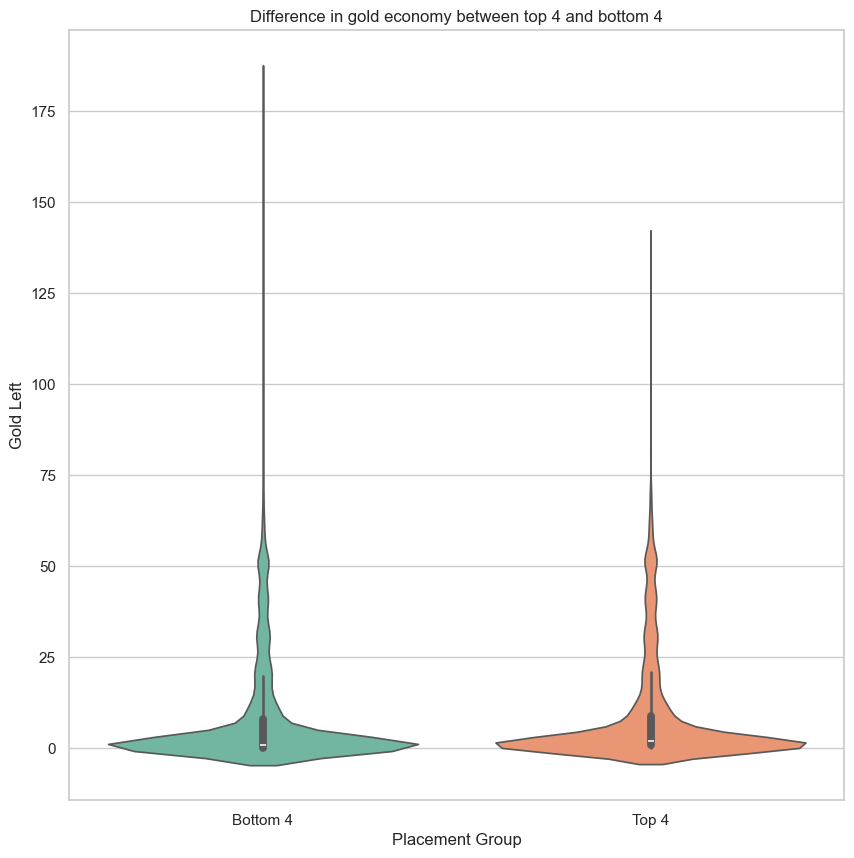

In [12]:
#TTest indicates high statistical siginifgance. 
#Lets use a violin plot top and bottom cut players without normalzaling the highly skewed variable

dfTFT["finish_group"] = dfTFT["placement"].apply(lambda x: "Top 4" if x <= 4 else "Bottom 4")
dfTFT["finish_group"].value_counts()

plt.figure(figsize = (10,10))
sns.violinplot(data = dfTFT, x = "finish_group", y = "gold_left" , palette = "Set2")

plt.title("Difference in gold economy between top 4 and bottom 4", fontsize = 12)
plt.xlabel("Placement Group", fontsize = 12)
plt.ylabel("Gold Left", fontsize = 12)

plt.tight_layout
plt.show()

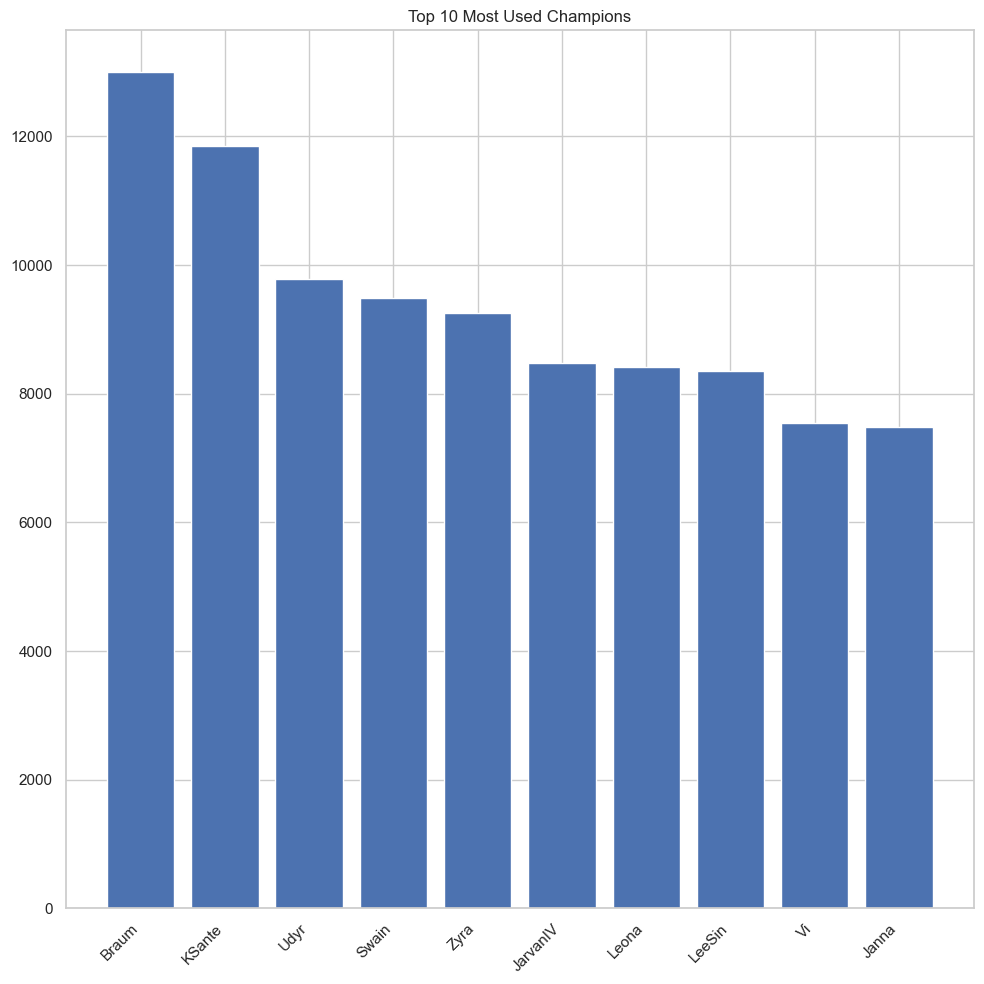

In [13]:
#Only use 15.22. This build of game only matters for these 2 visuals
dfTFT["champion_list"] = dfTFT["champion_list"].apply(ast.literal_eval)
counter = Counter()
for lst in dfTFT['champion_list']:
    counter.update(lst)
top = counter.most_common(10)
names = [x[0] for x in top]
counts = [x[1] for x in top]

plt.figure(figsize=(10,10))
plt.bar(names, counts)
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Most Used Champions")
plt.tight_layout()
plt.show()

In [14]:
champions = sorted({c for row in dfTFT["champion_list"] for c in row})
matrix = pd.DataFrame(0, index = champions, columns = champions)
for champs in dfTFT["champion_list"]:
    for c1, c2 in itertools.combinations(champs, 2):
        matrix.loc[c1, c2] += 1
        matrix.loc[c2, c1] += 1

for c in champions:
    matrix.loc[c, c] = dfTFT["champion_list"].apply(lambda x: c in x).sum()

print("Champion Co-occurrence Matrix:")
print(matrix)

Champion Co-occurrence Matrix:
        Aatrox  Ahri  Akali  Ashe  Braum  Caitlyn  Darius  DrMundo  Ezreal  \
Aatrox    7023    23   1406   273    969       11    2972     1574      37   
Ahri        23   729      3    23    157        0      17        8       7   
Akali     1406     3   1975    12     38        7    1711       27     113   
Ashe       273    23     12  4894   3030        1      29      407       3   
Braum      969   157     38  3030  12614       42      63     3664     203   
...        ...   ...    ...   ...    ...      ...     ...      ...     ...   
Yone       734     7     28    43    593        0      22      243       1   
Yuumi      107     6    113     5    297      499     229        2    3862   
Zac       2444     6    350    18    140       10    2861      261      61   
Ziggs      265     2     20    66    403        8      16       10       8   
Zyra      1108    46     98  3716   6918       12     260     2946     186   

        Gangplank  ...  Viego  V

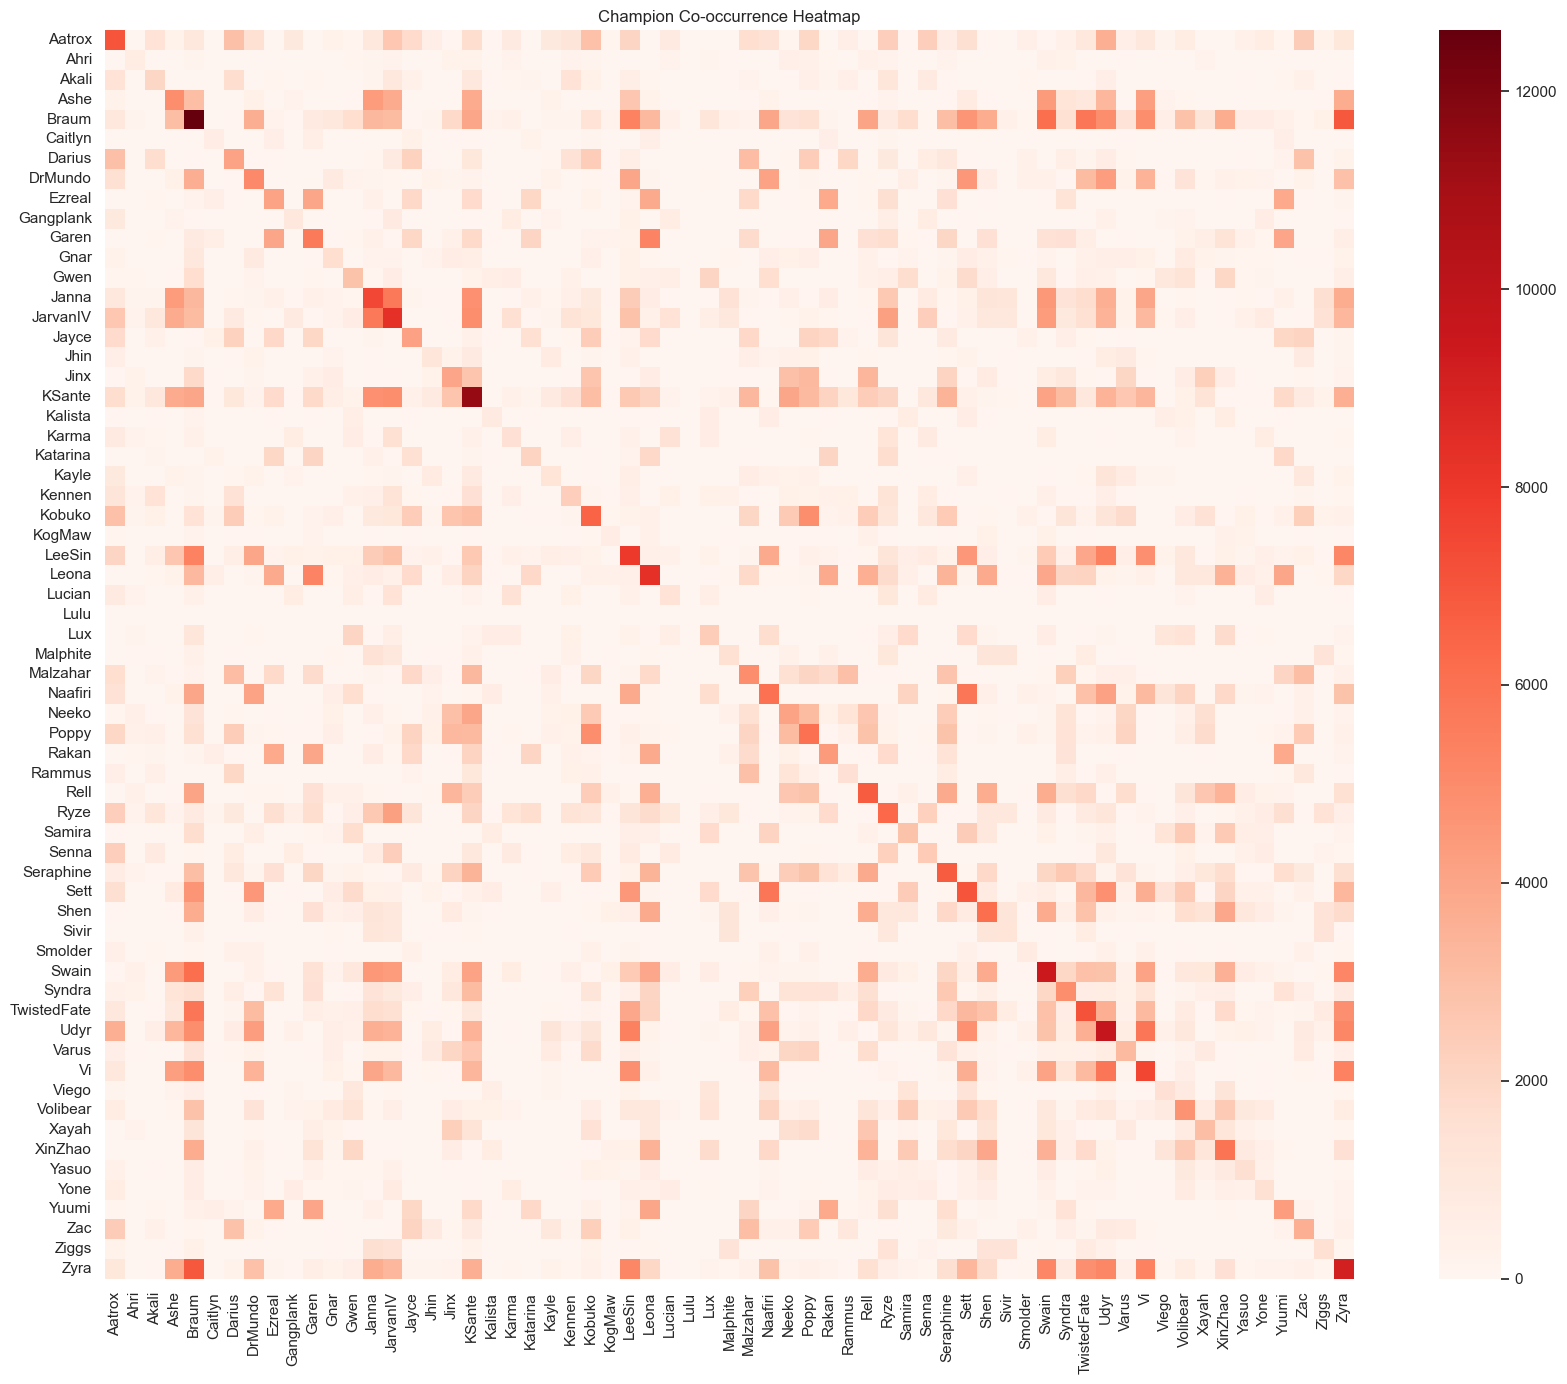

In [15]:
plt.figure(figsize = (18, 14))
sns.heatmap(matrix, cmap = "Reds", square = True, cbar = True)
plt.title("Champion Co-occurrence Heatmap")
plt.tight_layout()
plt.show()